# 4.3 アルゴリズム

In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)
# データフレームでの表示精度
pd.options.display.float_format = '{:.4f}'.format
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123

### 4.3.2 サンプルコーディングで用いるデータ

In [3]:
# サンプルデータの生成

# ライブラリインポート
from sklearn.datasets import make_moons, make_circles, make_classification

# 線形分離型
X1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
 random_state=random_seed, n_clusters_per_class=1, n_samples=200, n_classes=2)

# 三日月型 (線形分離不可)
X2, y2 = make_moons(noise = 0.05, random_state=random_seed, n_samples=200)

# 円形 (線形分離不可)
X3, y3 = make_circles(noise = 0.02, random_state=random_seed, n_samples=200)

# 3種類のデータをDataListに保存
DataList = [(X1, y1), (X2, y2), (X3, y3)]

# N: データの種類数
N = len(DataList)

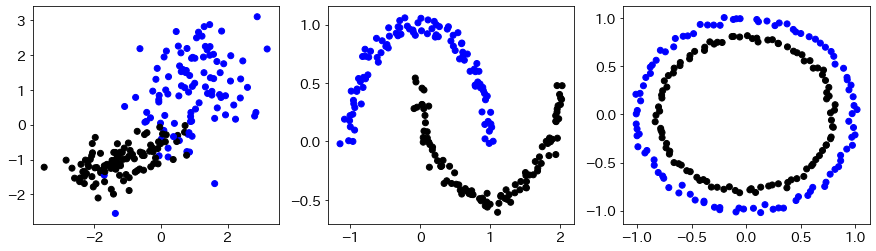

In [4]:
# 散布図表示
plt.figure(figsize=(15,4))

# カラーマップ定義
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#0000FF', '#000000'])

for i, data in enumerate(DataList):
    X, y = data
    ax = plt.subplot(1, N, i+1)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    
plt.show()

In [86]:
from sklearn.model_selection import train_test_split

# 決定境界の表示関数
def plot_boundary(ax, x, y, algorism):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)
    # カラーマップ定義
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    algorism.fit(x_train, y_train)
    score_test = algorism.score(x_test, y_test)
    score_train = algorism.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), 
                         np.arange(f2_min, f2_max, h))
    if hasattr(algorism, "decision_function"):
        Z = algorism.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorism.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = '検証: %.2f  訓練: %.2f' % (score_test, score_train)
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right') 
    

In [87]:
# 散布図と決定境界の表示関数

def plot_boundaries(algorism, DataList):
    plt.figure(figsize=(15,4))
    for i, data in enumerate(DataList):
        X, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, X, y, algorism)
    plt.show()

### 4.3.3 ロジスティック回帰

#### シグモイド関数のグラフ表示

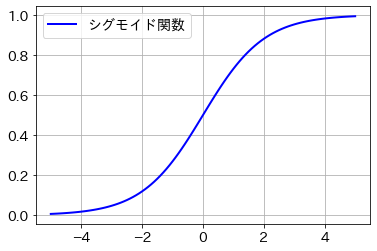

In [88]:
# シグモイド関数の定義
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# xのデータ準備
x = np.linspace(-5, 5, 101)

# yのデータ準備
y = sigmoid(x)

# グラフ表示
plt.plot(x, y, label='シグモイド関数', c='b', lw=2)

# 凡例表示
plt.legend()

# 方眼表示
plt.grid()

# グラフ描画
plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


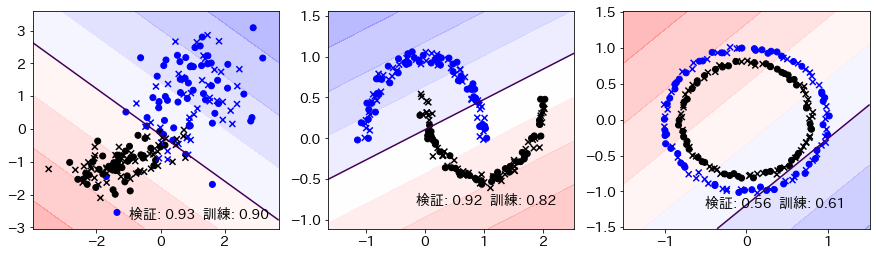

In [89]:
# ロジスティック回帰の散布図・決定境界表示

# アルゴリズムの選定
from sklearn.linear_model import LogisticRegression
algorism = LogisticRegression(random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorism)

# 表示関数の呼び出し
plot_boundaries(algorism, DataList)

### 4.3.4 サポートベクターマシン(カーネル)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)


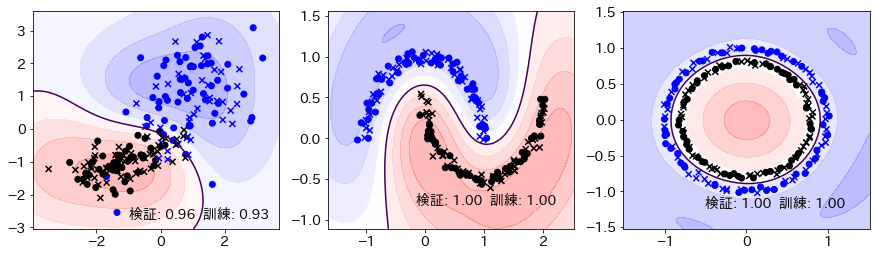

In [90]:
# SVM (カーネル)の散布図・決定境界表示

# アルゴリズムの選定
from sklearn.svm import SVC
algorism = SVC(kernel='rbf', random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorism)

# 表示関数の呼び出し
plot_boundaries(algorism, DataList)

### 4.3.5 ニューラルネット

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


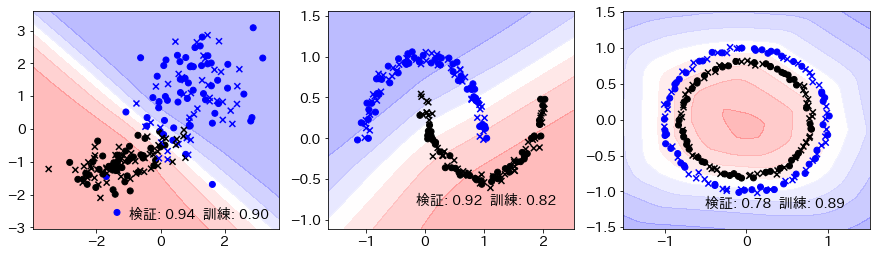

In [91]:
# ニューラルネットワークの散布図・決定境界表示

# アルゴリズムの選定
from sklearn.neural_network import MLPClassifier
algorism = MLPClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorism)

# 表示関数の呼び出し
plot_boundaries(algorism, DataList)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


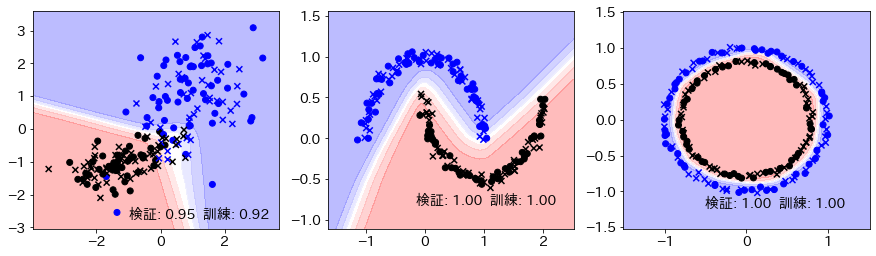

In [92]:
# ニューラルネットワークの散布図・決定境界表示

# アルゴリズムの選定
# 隠れ層ノード数=(100,100)
from sklearn.neural_network import MLPClassifier
algorism = MLPClassifier(hidden_layer_sizes=(100,100), random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorism)

# 表示関数の呼び出し
plot_boundaries(algorism, DataList)

### 4.3.6 決定木

In [93]:
# 追加ライブラリのimport
import seaborn as sns

# サンプルデータの読み込み
df_iris = sns.load_dataset("iris")

# 2種類の花に絞り込み
df2 = df_iris[50:150]

# データ分離
X = df2.drop('species', axis=1)
y = df2['species']

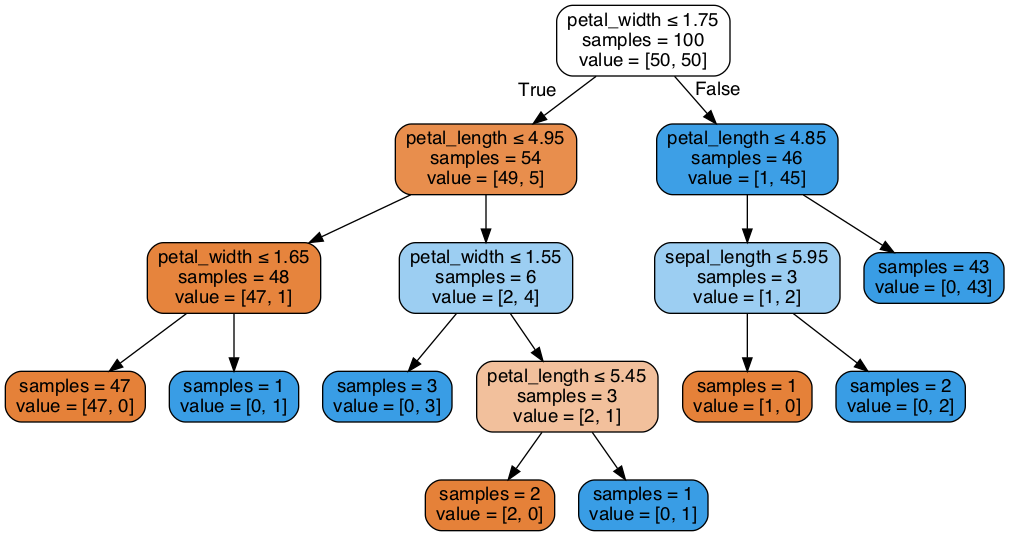

In [95]:
# 学習
from sklearn.tree import DecisionTreeClassifier
algoirism = DecisionTreeClassifier(random_state=random_seed)
algoirism.fit(X, y)

# 決定木のツリー表示
from sklearn import tree
with open('iris-dtree.dot', mode='w') as f:
    tree.export_graphviz( algoirism, out_file=f,
        feature_names=X.columns, filled=True, rounded=True,  
        special_characters=True, impurity=False, proportion=False
    ) 
import pydotplus
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file('iris-dtree.dot')
graph.write_png('iris-dtree.png')
Image(graph.create_png())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


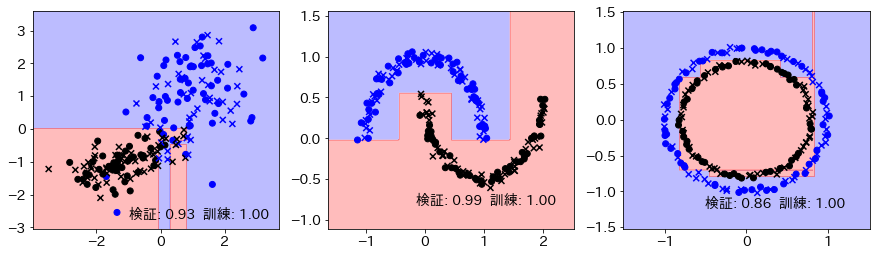

In [96]:
# 決定木の散布図・決定境界表示

# アルゴリズムの選定
from sklearn.tree import DecisionTreeClassifier
algorism = DecisionTreeClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorism)

# 表示関数の呼び出し
plot_boundaries(algorism, DataList)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


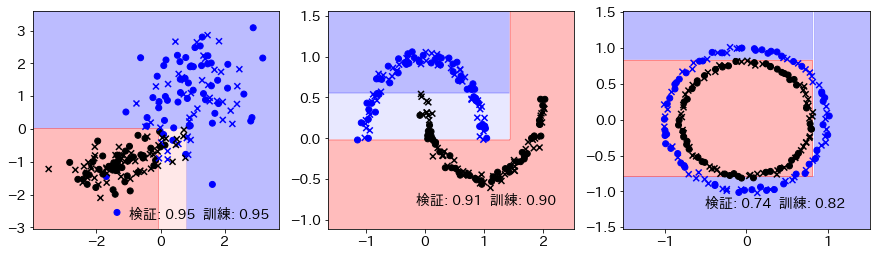

In [97]:
# 決定木の散布図・決定境界表示 (max_depth=3の場合)

# アルゴリズムの選定
from sklearn.tree import DecisionTreeClassifier
algorism = DecisionTreeClassifier(max_depth=3, random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorism)

# 表示関数の呼び出し
plot_boundaries(algorism, DataList)

### 4.3.7 ランダムフォレスト

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


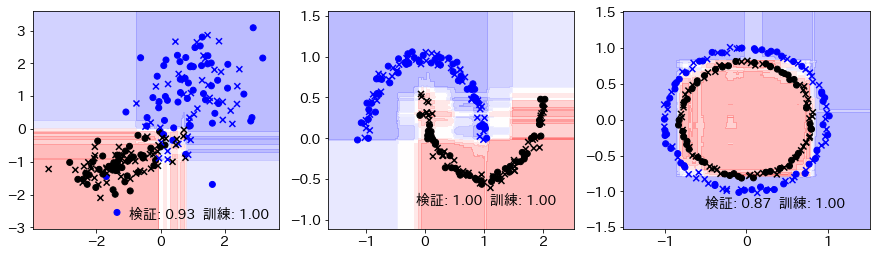

In [98]:
# ランダムフォレストの散布図・決定境界表示

# アルゴリズムの選定
from sklearn.ensemble import RandomForestClassifier
algorism = RandomForestClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorism)

# 表示関数の呼び出し
plot_boundaries(algorism, DataList)

### 4.3.8 XGBoost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


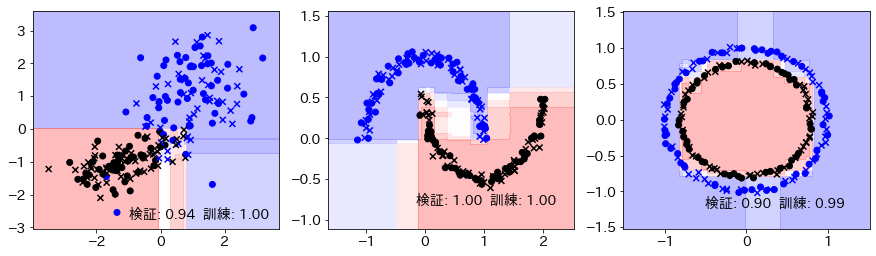

In [99]:
# XGBoostの散布図・決定境界表示

# アルゴリズムの選定
import xgboost
algorism = xgboost.XGBClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示 
print(algorism)

# 表示関数の呼び出し
plot_boundaries(algorism, DataList)

### 参考

In [1]:
import sklearn
print(sklearn.__version__)

0.22.1
